<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/HOG%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


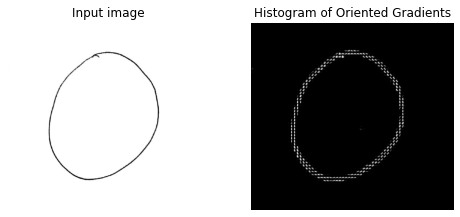

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.feature import hog
from skimage import data, color, exposure
from PIL import Image

img = io.imread(r"/content/drive/MyDrive/Chammaw/chakma-digit/0/1.JPG")
#im= Image.open(r"Insert\Image\Path\Here.jpg")
image = color.rgb2gray(img)

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
#ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
#ax1.set_adjustable('box-forced')
plt.show()

HOG by resizing image

(498, 540, 3)


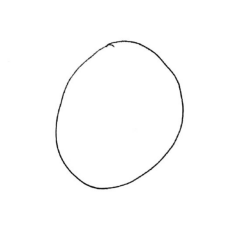

In [ ]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = imread('/content/drive/MyDrive/Chammaw/chakma-digit/0/1.JPG')
plt.axis("off")
plt.imshow(img)
print(img.shape)

(512, 256, 3)


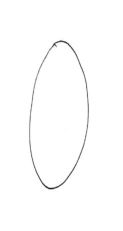

In [ ]:
# resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

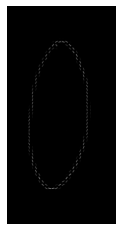

In [ ]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

HOG+SVM

In [ ]:
# Importing the necessary modules:

from skimage.feature import hog
from skimage.transform import pyramid_gaussian
from skimage.io import imread
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skimage import color
from imutils.object_detection import non_max_suppression
import imutils
import numpy as np
import argparse
import cv2
import os
import glob
from PIL import Image # This will be used to read/modify images (can be done via OpenCV too)
from numpy import *

# define parameters of HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
threshold = .3


# define path to images:

pos_im_path = r"/content/drive/MyDrive/Chammaw/chakma-digit/0" # This is the path of our positive input dataset

In [ ]:
# read the image files:
pos_im_listing = os.listdir(pos_im_path) # it will read all the files in the positive image path (so all the required images)
num_pos_samples = size(pos_im_listing) # simply states the total no. of images
print(num_pos_samples) # prints the number value of the no.of samples in positive dataset

data= []
labels = []

65


In [ ]:
# compute HOG features and label them:

for file in pos_im_listing: #this loop enables reading the files in the pos_im_listing variable one by one
    img = Image.open(pos_im_path + '/' + file) # open the file
    #img = img.resize((64,128))
    gray = img.convert('L') # convert the image into single channel i.e. RGB to grayscale
    # calculate HOG for positive features
    fd = hog(gray, orientations, pixels_per_cell, cells_per_block, block_norm='L2', feature_vector=True)# fd= feature descriptor
    data.append(fd)
    labels.append(1)

In [ ]:
print(data)
print(labels)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.        , 0.        , 0.        , ..., 0.07589384, 0.06269815,
       0.06788151]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.4216486 , 0.06761184, 0.04490545, ..., 0.        , 0.        ,
       0.        ]), array([0., 0., 

In [ ]:
# Partitioning the data into training and testing splits, using 80%
# of the data for training and the remaining 20% for testing
print(" Constructing training/testing split...")
(trainData, testData, trainLabels, testLabels) = train_test_split(
	np.array(data), labels, test_size=0.20, random_state=42)
print(trainData)
print(trainLabels)

 Constructing training/testing split...
[array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.]) array([0., 0., 0., ..., 0., 0., 0.])
 array([0., 0., 0., ..., 0., 0., 0.])
 array([0.        , 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


In [ ]:
#%% Train the linear SVM
print(" Training Linear SVM classifier...")
model = LinearSVC()
model.fit(trainData, trainLabels)
#%% Evaluate the classifier
print(" Evaluating classifier on test data ...")
predictions = model.predict(testData)
print(classification_report(testLabels, predictions))

 Training Linear SVM classifier...


ValueError: ignored